<a href="https://colab.research.google.com/github/amandarcrangel/engenharia-analytics-fiap/blob/main/An%C3%A1lises_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análises de outliers

Bibliotecas

In [1]:
# gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# aplicacao
from sklearn.preprocessing import scale
from sklearn.covariance import EmpiricalCovariance, MinCovDet


Dados

In [3]:
# carregar dados
dados_credito = pd.read_csv('dados_credito_small.csv', sep=',', decimal='.')

In [4]:
# dados credito
dados_credito.head()

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat
0,1,41,3,18,176,10.3,5.01,nao_pagou,ensin_sup,acima_40,"(54,446]"
1,2,27,1,10,31,17.3,4.00,pagou,ensin_basico,abaixo_30,"(24,34]"
2,3,40,1,15,55,5.5,2.17,pagou,ensin_basico,entre_30_40,"(54,446]"
3,4,41,1,15,120,2.9,0.82,pagou,ensin_basico,acima_40,"(54,446]"
4,5,24,2,2,28,17.3,3.06,nao_pagou,ensin_medio,abaixo_30,"(24,34]"


Identificaçao

Método Score Z

In [5]:
# dados z
dados_credito['outras_div_z'] = scale(dados_credito['outras_div'])

In [7]:
dados_credito.head()

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,outras_div_z
0,1,41,3,18,176,10.3,5.01,nao_pagou,ensin_sup,acima_40,"(54,446]",0.598029
1,2,27,1,10,31,17.3,4.00,pagou,ensin_basico,abaixo_30,"(24,34]",0.293935
2,3,40,1,15,55,5.5,2.17,pagou,ensin_basico,entre_30_40,"(54,446]",-0.257047
3,4,41,1,15,120,2.9,0.82,pagou,ensin_basico,acima_40,"(54,446]",-0.663509
4,5,24,2,2,28,17.3,3.06,nao_pagou,ensin_medio,abaixo_30,"(24,34]",0.010917


In [6]:
# ver os dados z
dados_credito.sort_values('outras_div_z', ascending = False)

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,outras_div_z
343,344,40,3,5,220,16.0,27.03,nao_pagou,ensin_sup,entre_30_40,"(54,446]",7.227876
466,467,47,3,16,221,17.6,23.10,nao_pagou,ensin_sup,acima_40,"(54,446]",6.044620
491,492,41,3,13,91,25.2,20.62,nao_pagou,ensin_sup,acima_40,"(54,446]",5.297934
478,479,51,2,27,166,11.5,18.27,pagou,ensin_medio,acima_40,"(54,446]",4.590389
325,326,54,1,25,119,26.5,17.20,nao_pagou,ensin_basico,acima_40,"(54,446]",4.268230
...,...,...,...,...,...,...,...,...,...,...,...,...
305,306,25,1,9,18,1.2,0.15,pagou,ensin_basico,abaixo_30,"[14,24]",-0.865234
271,272,22,1,4,16,1.2,0.11,pagou,ensin_basico,abaixo_30,"[14,24]",-0.877277
76,77,24,1,2,21,0.6,0.10,pagou,ensin_basico,abaixo_30,"[14,24]",-0.880288
10,11,27,1,0,16,1.7,0.09,pagou,ensin_basico,abaixo_30,"[14,24]",-0.883299


METÓDO DE BOX PLOT

<Axes: >

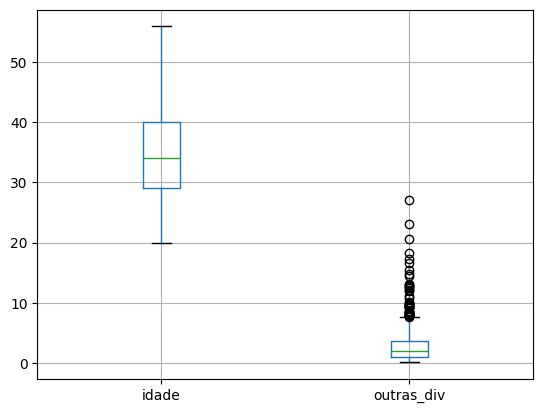

In [8]:
# box plot
dados_credito[['idade', 'outras_div']].boxplot()

Gráfico de dispersão

<Axes: xlabel='divida', ylabel='outras_div'>

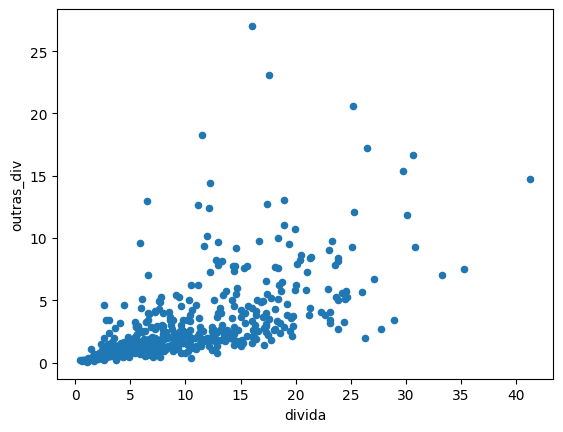

In [9]:
# scatterplot
dados_credito.plot.scatter(x = 'divida', y = 'outras_div')

Distância de mahalanobis

In [12]:
# mahalanobis váriancia
robust_cov = MinCovDet().fit(dados_credito[['idade', 'renda', 'divida']])


In [13]:
# distancia de mahalanobis
dados_credito['mahalanobis_d'] = robust_cov.mahalanobis(dados_credito[['idade', 'renda', 'divida']])
dados_credito.head()

,id,idade,educacao,tipo_emprego,renda,divida,outras_div,default,educacao_cat,idade_cat,renda_cat,outras_div_z,mahalanobis_d
0,1,41,3,18,176,10.3,5.01,nao_pagou,ensin_sup,acima_40,"(54,446]",0.598029,166.060651
1,2,27,1,10,31,17.3,4.00,pagou,ensin_basico,abaixo_30,"(24,34]",0.293935,3.105751
2,3,40,1,15,55,5.5,2.17,pagou,ensin_basico,entre_30_40,"(54,446]",-0.257047,3.650874
3,4,41,1,15,120,2.9,0.82,pagou,ensin_basico,acima_40,"(54,446]",-0.663509,57.513113
4,5,24,2,2,28,17.3,3.06,nao_pagou,ensin_medio,abaixo_30,"(24,34]",0.010917,3.907933


<Axes: xlabel='id', ylabel='mahalanobis_d'>

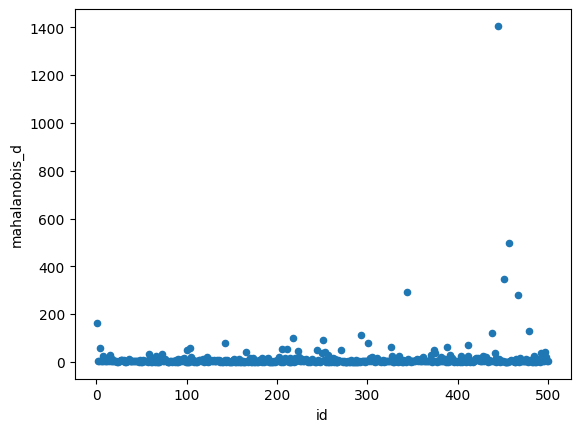

In [11]:
# gráfico mahalanobis
dados_credito.plot.scatter(x = 'id', y = 'mahalanobis_d')

Categorizar a variável

In [14]:
# categorizar
dados_credito['outras_div_cat'] = pd.qcut(dados_credito['outras_div'],
                                          q = 4,
                                          labels = ['baixa', 'baixa-media', 'media-alta', 'alta'])


In [15]:
# ver dados
dados_credito[['id', 'idade', 'outras_div', 'outras_div_cat']].head()

,id,idade,outras_div,outras_div_cat
0,1,41,5.01,alta
1,2,27,4.00,alta
2,3,40,2.17,media-alta
3,4,41,0.82,baixa
4,5,24,3.06,media-alta


Winsorizar

In [21]:
# obter os quartis
dados_credito['outras_div'].quantile([0.05, 0.9])

,outras_div
0.05,0.3795
0.90,7.2810


In [22]:
# winsorizar
dados_credito['outras_div_wins'] = dados_credito['outras_div'] \
                                        .clip(wins_values[0], wins_values[1])


In [18]:
# ver os dados
dados_credito[['id', 'outras_div', 'outras_div_wins']].head(10)

,id,outras_div,outras_div_wins
0,1,5.01,5.010
1,2,4.00,4.000
2,3,2.17,2.170
3,4,0.82,0.820
4,5,3.06,3.060
5,6,2.16,2.160
6,7,16.67,7.281
7,8,1.24,1.240
8,9,3.28,3.280
9,10,2.15,2.150


<Axes: >

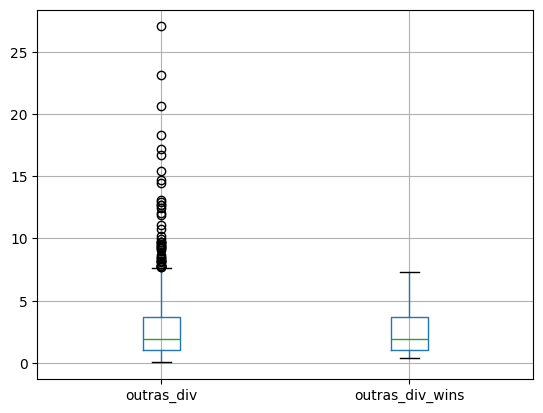

In [19]:
# box plot
dados_credito[['outras_div', 'outras_div_wins']].boxplot()